In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
carriers = {}
for line in open("./data/AFR.AMR_CF_risk_carriers.txt", "r"):
    carriers[line.strip("\n").split()[1]] = True
    
    
IID2AFF = {}
line_count = 0
for line in open("./data/gnomADv4.sampleQC.tsv", "r"):
    parsed_line = line.strip("\n").split("\t")
    if line_count == 0:
        col2idx = {}
        for i in range(len(parsed_line)):
            col2idx[parsed_line[i]] = i
    else:
        IID2AFF[parsed_line[col2idx["IID"]]] = parsed_line[col2idx["AFF"]]
    line_count += 1

LAI_carrier = []
LAI_non_carrier = []
line_count = 0
for line in open("./data/AdmixCount.txt", "r"):
    parsed_line = line.strip("\n").split("\t")
    if line_count == 0:
        col2idx = {}
        for i in range(len(parsed_line)):
            col2idx[parsed_line[i]] = i
        line_count += 1
    else:
        if sum([int(parsed_line[col2idx["AFR"]]), int(parsed_line[col2idx["AMR"]]), int(parsed_line[col2idx["EUR"]])]) == 2:
            # if IID2AFF[parsed_line[col2idx["ID"]]] == "Control":
            #     LAI_carrier.append([int(parsed_line[col2idx["AFR"]]), int(parsed_line[col2idx["AMR"]]), int(parsed_line[col2idx["EUR"]])])
            # else:
            #     LAI_non_carrier.append([int(parsed_line[col2idx["AFR"]]), int(parsed_line[col2idx["AMR"]]), int(parsed_line[col2idx["EUR"]])])
            if carriers.get(parsed_line[col2idx["ID"]]):
                LAI_carrier.append([int(parsed_line[col2idx["AFR"]]), int(parsed_line[col2idx["AMR"]]), int(parsed_line[col2idx["EUR"]])])
            else:
                LAI_non_carrier.append([int(parsed_line[col2idx["AFR"]]), int(parsed_line[col2idx["AMR"]]), int(parsed_line[col2idx["EUR"]])])
    



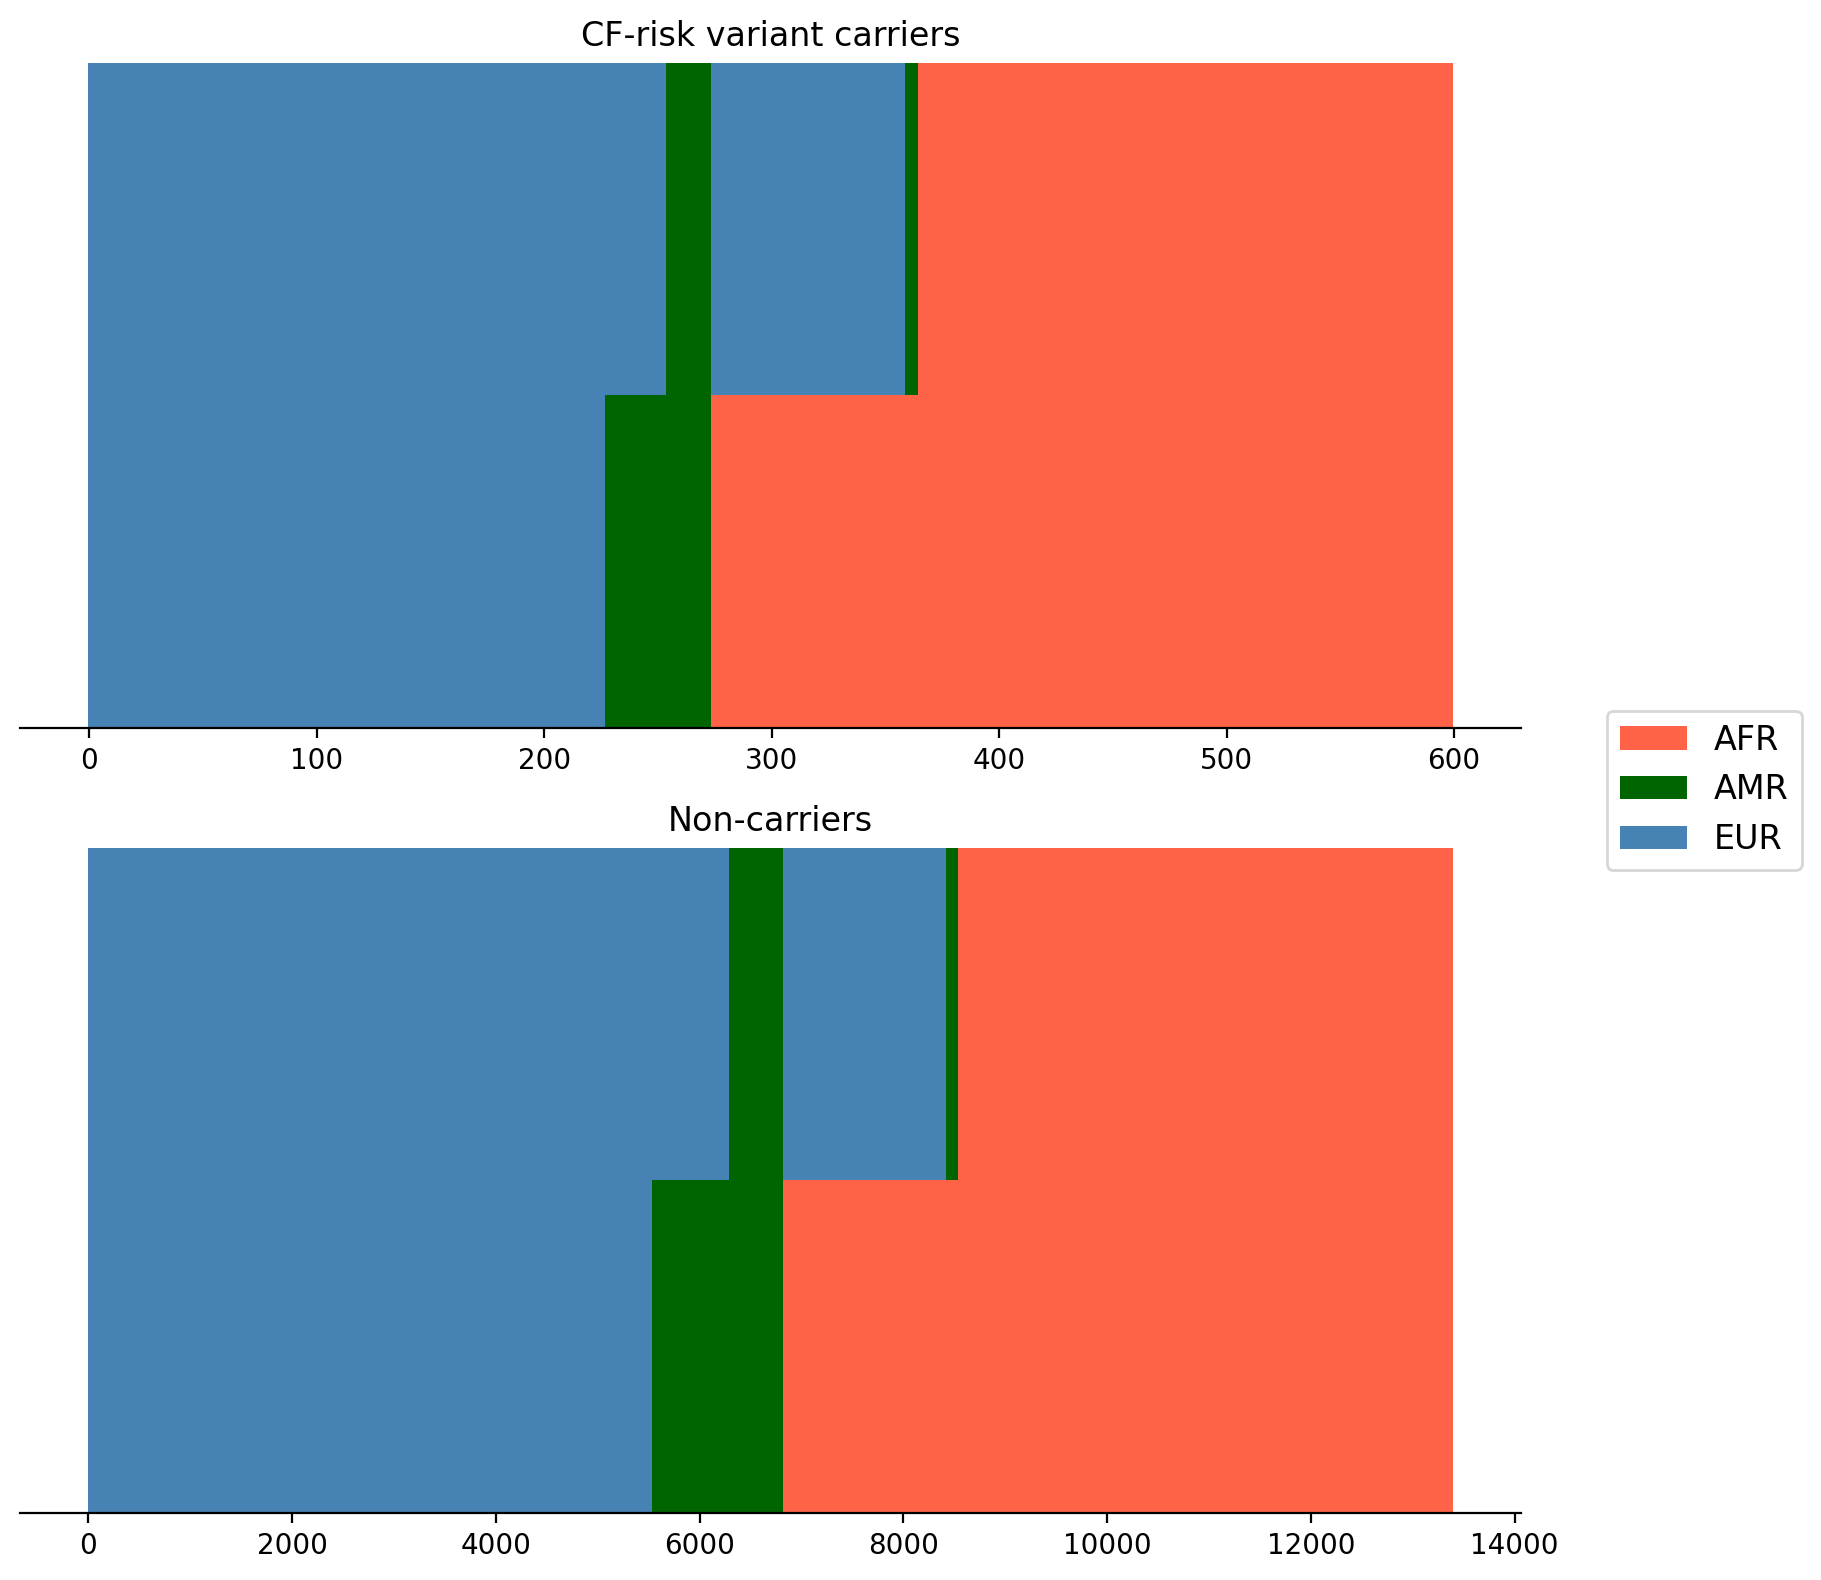

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8), dpi=200)

bar_width = 1
index = np.arange(len([LAI[0] for LAI in LAI_carrier]))
LAI_carrier = sorted(LAI_carrier)
AFR = [LAI[0] for LAI in LAI_carrier]
AMR = [LAI[1] for LAI in LAI_carrier]
EUR = [LAI[2] for LAI in LAI_carrier]

axes[0].bar(index, AFR, bar_width, label='AFR', color='tomato')
axes[0].bar(index, AMR, bar_width, bottom=AFR, label='AMR', color='darkgreen')
axes[0].bar(index, EUR, bar_width, bottom=np.array(AFR) + np.array(AMR), label='EUR', color='steelblue')
axes[0].set_title("CF-risk variant carriers", fontsize=12)
axes[0].set_yticks([])

index = np.arange(len([LAI[0] for LAI in LAI_non_carrier]))
LAI_non_carrier = sorted(LAI_non_carrier)
AFR = [LAI[0] for LAI in LAI_non_carrier]
AMR = [LAI[1] for LAI in LAI_non_carrier]
EUR = [LAI[2] for LAI in LAI_non_carrier]

axes[1].bar(index, AFR, bar_width, color='tomato')
axes[1].bar(index, AMR, bar_width, bottom=AFR, color='darkgreen')
axes[1].bar(index, EUR, bar_width, bottom=np.array(AFR) + np.array(AMR), color='steelblue')
axes[1].set_title("Non-carriers", fontsize=12)
axes[1].set_yticks([])

axes[0].spines['left'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Add legend outside the plot
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='center right')
lines, labels = axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()